In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sp
from scipy.optimize import curve_fit
from plotnine import *

In [2]:
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
def peaks(y):
    peaks1,prop  = sp.find_peaks(y[543:624],2800)
    peaks1 = np.array(543+peaks1)
    print(peaks1)
    return peaks1

def peaky(x,y, start,fin,w):
    start = find_nearest(x,start)
    fin = find_nearest(x,fin)
    geusse = np.argmax(y[start:fin])
    geusse += start
    popt, pcov = curve_fit(gaussian, x[geusse-w:geusse+w],y[geusse-w:geusse+w],p0=[3000, x[geusse], 1])
    return popt

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def find_peaks_MoS2(x,y,w=3,lines=False):
    start_peak1 = find_nearest(x,370)
    fin_peak1 = find_nearest(x,390)
    start_peak2 = find_nearest(x,395)
    fin_peak2 = find_nearest(x,420)
    
    geusse1 = np.argmax(y[start_peak1:fin_peak1]) + start_peak1
    geusse2 = np.argmax(y[start_peak2:fin_peak2]) + start_peak2
    
    popt1, pcov = curve_fit(gaussian, x[geusse1-w:geusse1+w],y[geusse1-w:geusse1+w],p0=[3000, x[geusse1], 1])
    popt2, pcov = curve_fit(gaussian, x[geusse2-w:geusse2+w],y[geusse2-w:geusse2+w],p0=[3000, x[geusse2], 1])
    if lines == True:
        return popt1[1],popt2[1]
    else:
        return popt2[1]- popt1[1]



           Flake  Seperation
0       E12_Bulk   25.045178
2       E10_Thin   22.211537
5    M11_A1_Thin   21.440728
1       E12_Thin   21.279171
3    M11_A2_Thin   21.146904
4  M11_A2_2_Thin   20.307290


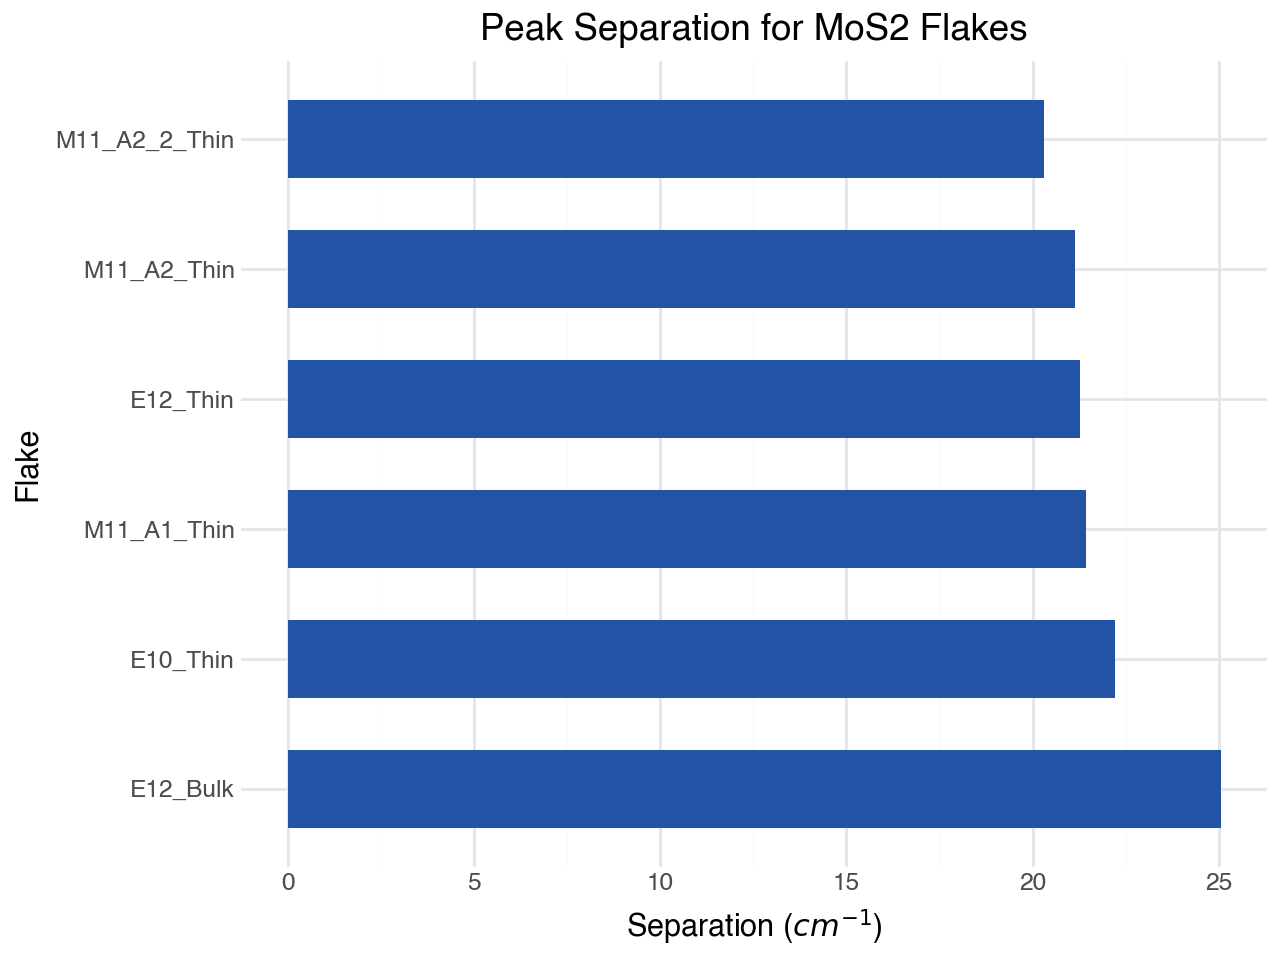

In [67]:
PATH = "EXCHIPS_Session1/"

norm = 200
xE12_Bulk = np.loadtxt(PATH+"01 ExChip_1_E12_Bulk (X-Axis).txt")
yE12_Bulk = np.loadtxt(PATH+"01 ExChip_1_E12_Bulk (Y-Axis).txt")

xE12_Thin = np.loadtxt(PATH+"02 ExChip_7_E12_Thin--Spec.Data 1 (X-Axis).txt")
yE12_Thin = np.loadtxt(PATH+"02 ExChip_7_E12_Thin--Spec.Data 1 (Y-Axis).txt")

xE10_Thin = np.loadtxt(PATH+"04 ExChip_7_E10_Thin (X-Axis).txt")
yE10_Thin = np.loadtxt(PATH+"04 ExChip_7_E10_Thin (Y-Axis).txt")

xM11_A2_Thin = np.loadtxt(PATH+"08 ExChip_7_M11_Area2_3.Data 1 (X-Axis).txt")
yM11_A2_Thin = np.loadtxt(PATH+"08 ExChip_7_M11_Area2_3.Data 1 (Y-Axis).txt")

xM11_A2_2_Thin = np.loadtxt(PATH+"07 ExChip_7_M11_Area2_2.Data 1 (X-Axis).txt")
yM11_A2_2_Thin = np.loadtxt(PATH+"07 ExChip_7_M11_Area2_2.Data 1 (Y-Axis).txt")

xM11_A1_Thin = np.loadtxt(PATH+"05 ExChip_7_M11_Area1.Data 1 (X-Axis).txt")
yM11_A1_Thin = np.loadtxt(PATH+"05 ExChip_7_M11_Area1.Data 1 (Y-Axis).txt")

df = pd.DataFrame([["E12_Bulk",find_peaks_MoS2(xE12_Bulk,yE12_Bulk)],
                   ["E12_Thin",find_peaks_MoS2(xE12_Thin,yE12_Thin)],
                   ["E10_Thin",find_peaks_MoS2(xE10_Thin,yE10_Thin)],
                   ["M11_A2_Thin",find_peaks_MoS2(xM11_A2_Thin,yM11_A2_Thin)],
                   ["M11_A2_2_Thin",find_peaks_MoS2(xM11_A2_2_Thin,yM11_A2_2_Thin)],
                   ["M11_A1_Thin",find_peaks_MoS2(xM11_A1_Thin,yM11_A1_Thin)]
                   ], columns=["Flake","Seperation"])
df.sort_values(by=["Seperation"],ascending=False, inplace=True)
print(df)

(ggplot(df,aes(x = "Flake", y = "Seperation"))
 +geom_bar(stat = "identity", fill="#2253A7FF", width = 0.6)
 +scale_x_discrete(limits=df["Flake"].tolist())
 +coord_flip()
 +theme_minimal()
 +labs(x='Flake',y=r"Separation ($cm^{-1}$)" ,title="Peak Separation for MoS2 Flakes"))


In [69]:
mono = 18, bi = 22, tri = 23, four = 24, bulk = 25

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2315516023.py, line 1)